**Online Payments Fraud Detection (BB PLC Case Study)**

Blosssom Bank ( BB PLC) is a multinational finbancial services group, that offers retail and investment banking, pension management, assets management and payment services, headquartered in London, UK.

Blossom Bank wants to build a machine learning model to predict online payment fraud.

This is 'Binary Classification' task and the algorithms employed will be supervised learning algorithms. The dataset used for this task is: https://drive.google.com/file/d/1ZIjmAjPccvy16mOk7nrPtWe-_3rRP5zy/view?usp=sharing

With this model, BB PLC will:

1.Keep up with fast evolving technological threats and better prevent the loss of funds (profit) to fraudsters.

2.Accurately detect and identify anomalies in managing online transactions done on its platforms which may go undetected using traditional rules-based methods.

3.Improve quality assurance thus retaining old customers and acquire new ones. This will increase credit/profit base.

4.Improve its policy and decision making.

In [5]:
#import the libaries to work with for EDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#loading the data set
data = pd.read_csv('Online Payment Fraud Detection.csv',encoding='unicode-escape')

**Understanding the Data**

In [7]:
# Checking the size of the dataset (Rows,Columns)
data.shape

(1048575, 10)

In [8]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [11]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [13]:
data.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


In [14]:
#check for missing Data using isna().sum()

data.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


  **Relationships and Insights**




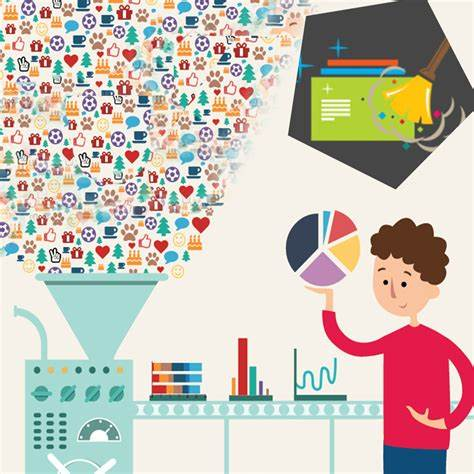

In [15]:
#Checking which recipients stand out

data.nameDest.unique()

array(['M1979787155', 'M2044282225', 'C553264065', ..., 'M1355182933',
       'M1964992463', 'M677577406'], dtype=object)

In [16]:
#Investigating to check unique customers
data.nameOrig.unique()

array(['C1231006815', 'C1666544295', 'C1305486145', ..., 'C2037964975',
       'C1633237354', 'C1264356443'], dtype=object)

In [17]:
#investigating to see how many times a customer started a transaction
data.nameOrig.value_counts()

,count
nameOrig,
C443816828,2
C1598037681,2
C1959089715,2
C789225614,2
C1710302637,2
...,...
C650578540,1
C1883668225,1
C1189493203,1


In [18]:
#How many times a recipient got a transaction
data.nameDest.value_counts()

,count
nameDest,
C985934102,98
C1286084959,96
C1590550415,89
C248609774,88
C665576141,87
...,...
M1118794441,1
M1127250627,1
M268782365,1


In [19]:
data.amount.max()

10000000.0

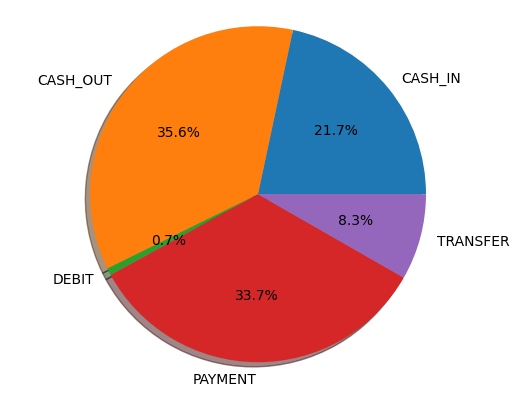

In [20]:
#Checking the distribution of the type of transactions made

labels = data['type'].astype('category').cat.categories.tolist()
counts = data['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [21]:
#Investigating how many times a particular type of transaction was carried out.

data.type.value_counts()

,count
type,
CASH_OUT,373641
PAYMENT,353873
CASH_IN,227130
TRANSFER,86753
DEBIT,7178


In [22]:
#Investigating the top customers and the type of transactions they initiated
top_ten = data.groupby('nameOrig').type.sum().sort_values(ascending=False)[:10]
top_ten

,type
nameOrig,
C24957224,TRANSFERTRANSFER
C1378765159,TRANSFERTRANSFER
C813633808,TRANSFERTRANSFER
C940075559,TRANSFERTRANSFER
C1709295811,TRANSFERPAYMENT
C196315367,TRANSFERPAYMENT
C1077087409,TRANSFERPAYMENT
C495164373,TRANSFERPAYMENT
C192628069,TRANSFERPAYMENT


In [23]:
#Checking the average amounttransacted
data['amount'].mean()

np.float64(158666.9755271392)

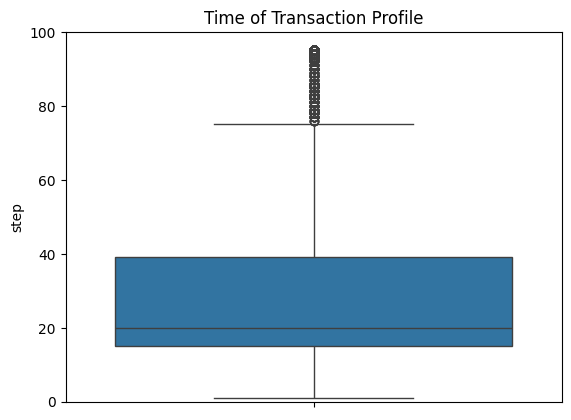

In [24]:
sns.boxplot(y=data.step)
plt.title('Time of Transaction Profile')
plt.ylim(0,100)
plt.show()

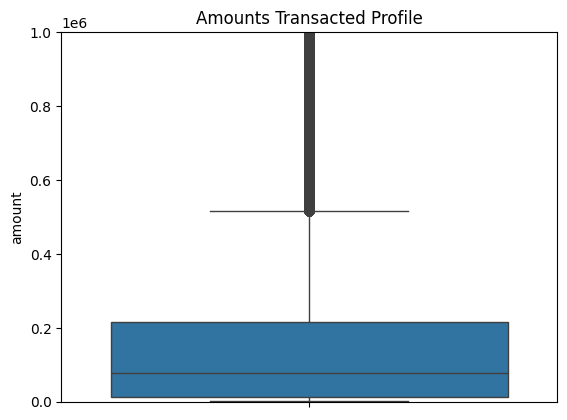

In [25]:
sns.boxplot(y=data.amount)
plt.title('Amounts Transacted Profile')
plt.ylim(0,1000000)
plt.show()

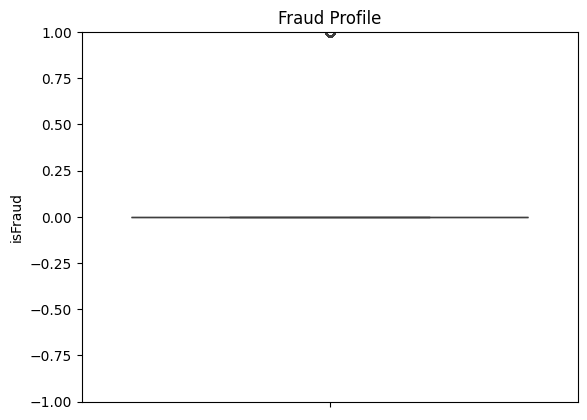

In [26]:
sns.boxplot(y=data.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

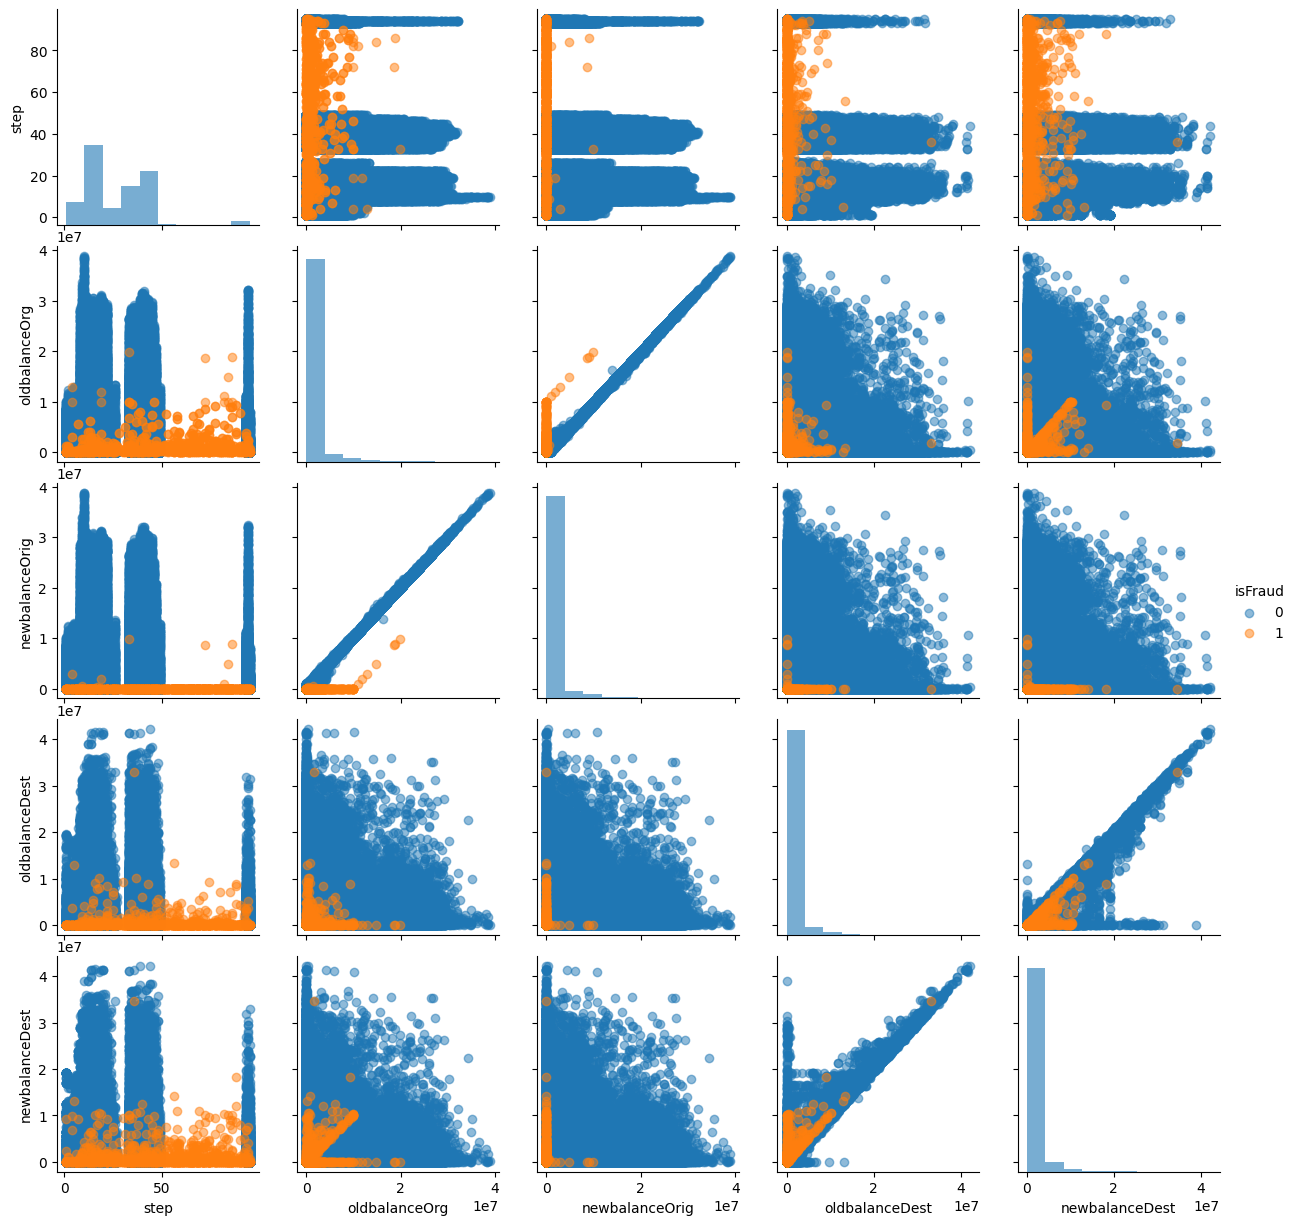

In [27]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(data, vars = ['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

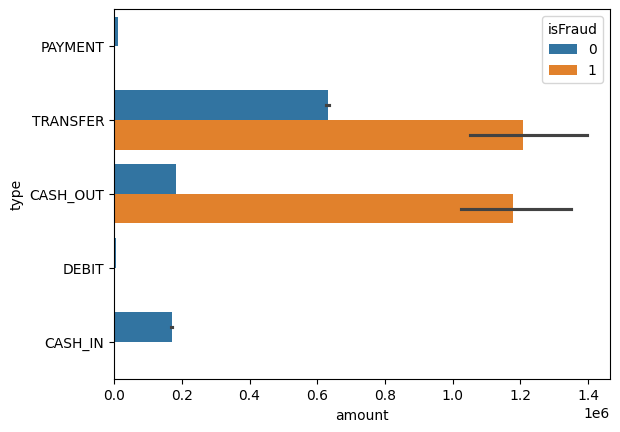

In [28]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=data)
plt.show()

(0.0, 2000000.0)

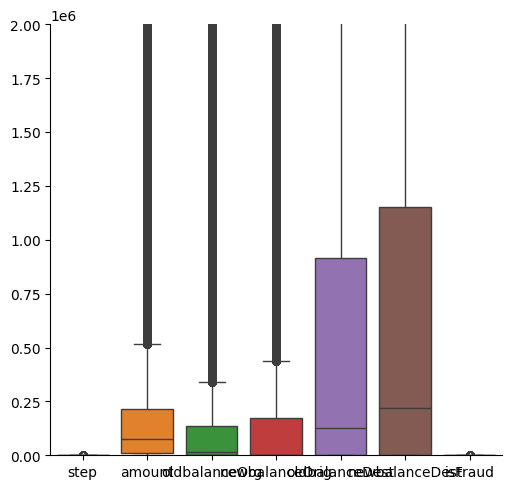

In [29]:
sns.catplot(data=data,kind='box')

plt.ylim(0,2000000)

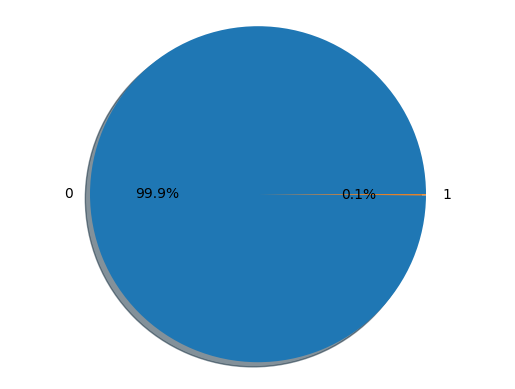

In [30]:
# Fraud Distribution

labels = data['isFraud'].astype('category').cat.categories.tolist()
counts = data['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

In [31]:
# Sepearating Fraudulent transaction from non fraudulent

Fraudulent_Transaction = data[data.isFraud ==1]
Not_Fraudulent_Transaction = data[data.isFraud ==0]

In [32]:
print('Fraudulent Transaction: {}'.format(len(Fraudulent_Transaction)))
print('Not Fraudulent Transaction: {}'.format(len(Not_Fraudulent_Transaction)))

Fraudulent Transaction: 1142
Not Fraudulent Transaction: 1047433


In [33]:
#Understanding The statistical nature of Non Fraudulent Transactions.

Not_Fraudulent_Transaction.amount.describe()

,amount
count,1.047433e+06
mean,1.575397e+05
std,2.541883e+05
min,1.000000e-01
25%,1.213487e+04
50%,7.621497e+04
75%,2.134928e+05
max,6.419835e+06


In [34]:
#Understanding The statistical nature of Fraudulent Transactions.

Fraudulent_Transaction.amount.describe()

,amount
count,1.142000e+03
mean,1.192629e+06
std,2.030599e+06
min,1.190000e+02
25%,8.607017e+04
50%,3.531794e+05
75%,1.248759e+06
max,1.000000e+07


**Undersampling**

Building a sample dataset containing similar distribution of Non Fraudulent transactions and Fraudulent transactions. This rectifies the class-imbalance and helps our machine learning model to perform better predictions.

Since we want to build a model that detects Fraud, we base our sampling on the number of transactions classed as fraudulent in our original dataset.

Fraudulent transactions: 114

In [36]:
Non_Fraudulent_Sample = Not_Fraudulent_Transaction.sample(n=1142)

In [37]:
new_dataset = pd.concat([Non_Fraudulent_Sample, Fraudulent_Transaction], axis=0)

In [38]:
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
234379,14,PAYMENT,5964.71,C2116678202,38524.63,32559.92,M1882275317,0.00,0.00,0
659833,35,CASH_IN,162187.72,C704270632,72629.00,234816.72,C623008408,3424388.13,3262200.41,0
76832,10,TRANSFER,1439850.16,C265937362,106460.00,0.00,C1599009738,958.00,1440808.16,0
18557,8,CASH_OUT,92686.04,C1516885396,0.00,0.00,C225852166,465052.59,877929.84,0
924061,43,CASH_IN,52512.89,C917348285,1317055.48,1369568.37,C268784004,1614724.24,1562211.36,0


In [39]:

new_dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
1048324,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


In [40]:
new_dataset['isFraud'].value_counts()

,count
isFraud,
0,1142
1,1142


In [41]:
new_dataset.shape

(2284, 10)

**Feature Engineering**

To train and test our machine learning model, we select features (columns) from our dataset
Because our dataset contains categorial values ('nameOrig', 'nameDest'). it becomes necessary to convert them into binary format which can be readily used by or Machine learning model.

This is done through one-hot encoding.

In [44]:
# One-hot Encoding.
#Importing library

from sklearn.preprocessing import OneHotEncoder

In [46]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [47]:
#perform one-hot encoding on 'type' column
encoder_df =  pd.get_dummies(new_dataset, columns=['type','nameOrig','nameDest'], prefix=['type','nameOrig','nameDest'])

In [48]:

encoder_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M948582498,nameDest_M951098021,nameDest_M953227774,nameDest_M960041564,nameDest_M96450180,nameDest_M973403710,nameDest_M988038773,nameDest_M98982480,nameDest_M999123092,nameDest_M999274838
234379,14,5964.71,38524.63,32559.92,0.00,0.00,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
659833,35,162187.72,72629.00,234816.72,3424388.13,3262200.41,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
76832,10,1439850.16,106460.00,0.00,958.00,1440808.16,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18557,8,92686.04,0.00,0.00,465052.59,877929.84,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
924061,43,52512.89,1317055.48,1369568.37,1614724.24,1562211.36,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048221,95,33676.59,33676.59,0.00,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048323,95,87999.25,87999.25,0.00,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
encoder_df.shape

(2284, 4560)

In [50]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M948582498,nameDest_M951098021,nameDest_M953227774,nameDest_M960041564,nameDest_M96450180,nameDest_M973403710,nameDest_M988038773,nameDest_M98982480,nameDest_M999123092,nameDest_M999274838
234379,14,5964.71,38524.63,32559.92,0.00,0.00,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
659833,35,162187.72,72629.00,234816.72,3424388.13,3262200.41,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
76832,10,1439850.16,106460.00,0.00,958.00,1440808.16,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18557,8,92686.04,0.00,0.00,465052.59,877929.84,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False
924061,43,52512.89,1317055.48,1369568.37,1614724.24,1562211.36,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
encoder_df.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,nameDest_M948582498,nameDest_M951098021,nameDest_M953227774,nameDest_M960041564,nameDest_M96450180,nameDest_M973403710,nameDest_M988038773,nameDest_M98982480,nameDest_M999123092,nameDest_M999274838
1047888,95,56745.14,56745.14,0.0,51433.88,108179.02,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048221,95,33676.59,33676.59,0.0,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048222,95,33676.59,33676.59,0.0,0.00,33676.59,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1048323,95,87999.25,87999.25,0.0,0.00,0.00,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1048324,95,87999.25,87999.25,0.0,0.00,87999.25,1,False,True,False,...,False,False,False,False,False,False,False,False,False,False


**Target, Feature Split**

Target Selection

'isFraud' column selected as Target (Y)

In [52]:
Y = encoder_df['isFraud']

In [53]:
features = encoder_df.drop('isFraud', axis=1)

In [54]:
X = features

In [55]:
Y.head()

,isFraud
234379,0
659833,0
76832,0
18557,0
924061,0


In [56]:
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,nameDest_M948582498,nameDest_M951098021,nameDest_M953227774,nameDest_M960041564,nameDest_M96450180,nameDest_M973403710,nameDest_M988038773,nameDest_M98982480,nameDest_M999123092,nameDest_M999274838
234379,14,5964.71,38524.63,32559.92,0.00,0.00,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
659833,35,162187.72,72629.00,234816.72,3424388.13,3262200.41,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
76832,10,1439850.16,106460.00,0.00,958.00,1440808.16,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18557,8,92686.04,0.00,0.00,465052.59,877929.84,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
924061,43,52512.89,1317055.48,1369568.37,1614724.24,1562211.36,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
#create X_train, X_test, Y_train, Y_test
# using test_size of 20%

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=2)

In [59]:
print('\n',X_train.head(2))

print('\n',X_test.head(2))

print('\n',Y_train.head(2))

print('\n',Y_test.head(2))


          step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1030484    67  106460.70       106460.7             0.0      1414263.15   
740576     38  672341.15            0.0             0.0      2579393.57   

         newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030484      1520723.84         False           True       False   
740576       3251734.72         False           True       False   

         type_PAYMENT  ...  nameDest_M948582498  nameDest_M951098021  \
1030484         False  ...                False                False   
740576          False  ...                False                False   

         nameDest_M953227774  nameDest_M960041564  nameDest_M96450180  \
1030484                False                False               False   
740576                 False                False               False   

         nameDest_M973403710  nameDest_M988038773  nameDest_M98982480  \
1030484                False                False        

**Training our Classification Model with a Logistic Regression Classifier**

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model = LogisticRegression()

In [62]:
#Training model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
model_pred = model.predict(X_test)

In [64]:
# Obtain model probabilities
probs = model.predict_proba(X_test)

**Logistic Regression Model Evaluation**

In [65]:
#importing the methods
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [66]:
print('\nClassification Report:')
print(classification_report(Y_test, model_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       229
           1       0.94      0.90      0.92       228

    accuracy                           0.92       457
   macro avg       0.92      0.92      0.92       457
weighted avg       0.92      0.92      0.92       457



In [67]:
# check True Negatives/Positives, False Negatives/Positives
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),215,14
Actually Positive(1),23,205


In [68]:
# Print confusion matrix using predictions in context
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),215,14
Actually Fraud(1),23,205


In [69]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9190371991247265


OurLogistic Regression Model indicates 93% accuracy

In [70]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

np.float64(0.891972864277036)

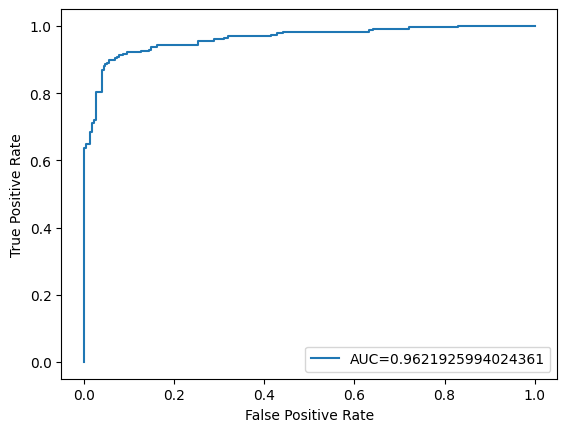

In [71]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [72]:
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:,1]))

AUC Score:
0.9621925994024361


The ROC curve, also known as Receiver Operating Characteristics Curve, is a metric used to measure the performance of a classifier model. The ROC curve depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model. The higher the AUC (Area Under The Curve), the better the performance of the model at distinguishing between the positive and negative classes. It is a better metric than accuracy score.

An AUC score of 0.97 suggests that 97% of our prdictions will be correct.

**Training with Random Forest Classifier**

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5, n_estimators=20)

In [75]:
model.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=20, random_state=5)

In [76]:
model_pred = model.predict(X_test)

In [77]:

# Obtain model probabilities
probs = model.predict_proba(X_test)

**Random Forest Model Evaluation**

In [78]:

#importing the methods
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, precision_recall_curve, average_precision_score, roc_auc_score

In [79]:
# Print classification report using predictions
print('Classification_Report:\n',classification_report(Y_test, model_pred))

Classification_Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       229
           1       0.98      0.96      0.97       228

    accuracy                           0.97       457
   macro avg       0.97      0.97      0.97       457
weighted avg       0.97      0.97      0.97       457



In [80]:
# Print confusion matrix using predictions
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Negative(0) ', 'Predicted Positive(1)'],
             index=['Actually Negative(0)', 'Actually Positive(1)'])

,Predicted Negative(0),Predicted Positive(1)
Actually Negative(0),224,5
Actually Positive(1),10,218


In [81]:
# Print confusion matrix using predictions in Context
pd.DataFrame(confusion_matrix(Y_test, model_pred),
             columns=['Predicted Not Fraud(0) ', 'Predicted Fraud(1)'],
             index=['Actually Not Fraud(0)', 'Actually Fraud(1)'])

,Predicted Not Fraud(0),Predicted Fraud(1)
Actually Not Fraud(0),224,5
Actually Fraud(1),10,218


In [82]:
# ACCURACY SCORE
print('Accuracy:',accuracy_score(Y_test, model_pred))

Accuracy: 0.9671772428884027


In [83]:
# Calculate average precision and the P-R curve
average_precision = average_precision_score(Y_test, model_pred)
average_precision

np.float64(0.9565840644924614)

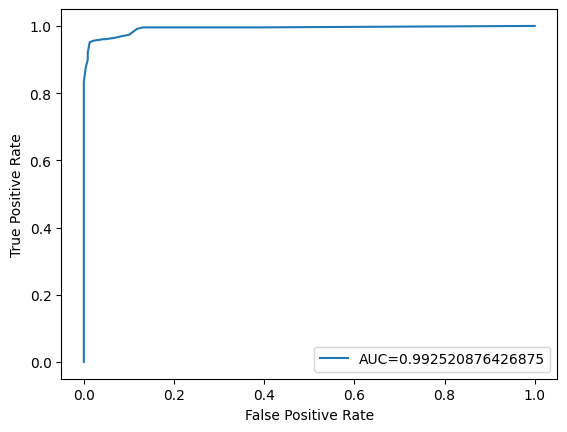

In [84]:
#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)


#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [85]:

# Print ROC_AUC score using probabilities
print('AUC Score:')
print(roc_auc_score(Y_test, probs[:, 1]))

AUC Score:
0.992520876426875
